**Potability of the water___Kaggle dataset**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [49]:
water = pd.read_csv("water_potability/water_potability.csv")
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [50]:
water.shape

(3276, 10)

In [51]:
df = water.copy()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


**Treatment of null values**

In [53]:
(df
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [54]:
null_values = (df
            .isnull()
            .sum()
        )
percent = null_values.apply(lambda x: x/df.shape[0])

missing_data = pd.concat([null_values,percent], axis=1, keys=["Null",'Percent'])
missing_data.sort_values(by='Percent', ascending  = False, inplace=True)
missing_data

,Null,Percent
Sulfate,781,0.238400
ph,491,0.149878
Trihalomethanes,162,0.049451
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Turbidity,0,0.000000
Potability,0,0.000000


**Replacement of null values by the median of the features**

In [55]:
columns = ['Sulfate', 'ph', 'Trihalomethanes']
for col in columns:
    df[col].fillna(df[col].median(), inplace=True)

In [56]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**To determine the collinearity**

In [57]:
colm = df.columns.drop('Potability')
correlation = np.abs(df[colm].corr())

list_colinearity = (correlation
                    .where(np.triu(correlation,k=1).astype(np.bool),0)
                    .gt(0.8)
                    .stack()
                    .loc[lambda x:x]
                    .index.to_list()
                    )
if len(list_colinearity) == 0:
    print('There is no collinearity')

There is no collinearity


**Verify if there are outliers by using boxplot**

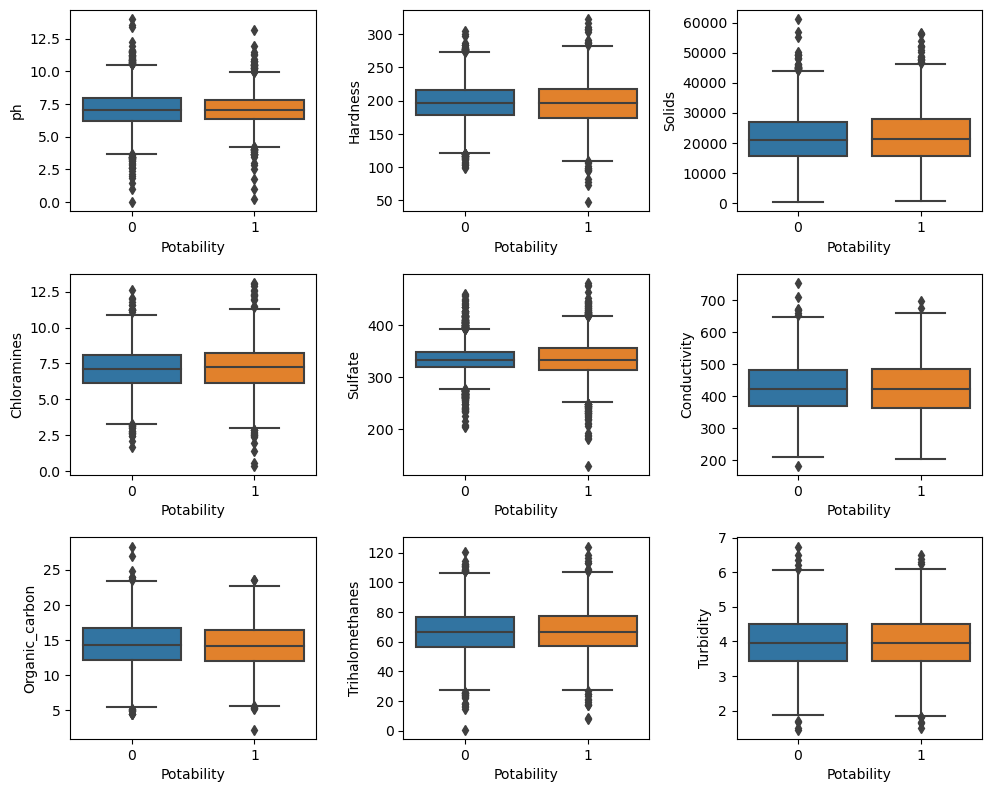

In [58]:
columns = df.columns.drop('Potability')
fig = plt.figure(figsize=(10,8))
index = 1
for col in columns:
    plt.subplot(3,3,index)
    sns.boxplot(x = 'Potability',  y = col ,data = df)
    index = index + 1
fig.tight_layout(pad=1.0)


**Determine the skewness of features**

In [59]:
numeric_feature = (df[columns]
                    .apply(lambda x: np.abs(skew(x)))
                    .sort_values(ascending=False)
                    )
numeric_feature
    

Solids             0.621350
Conductivity       0.264369
Trihalomethanes    0.087249
ph                 0.041248
Hardness           0.039324
Sulfate            0.027265
Organic_carbon     0.025521
Chloramines        0.012093
Turbidity          0.007813
dtype: float64

**Scaling the features**

In [60]:
scaler = RobustScaler()
X_transfomed = scaler.fit_transform(df[columns])
y = df["Potability"].values

X_transfomed.shape , y.shape

((3276, 9), (3276,))

In [61]:
X_train, X_test,y_train,y_test = train_test_split(X_transfomed,y, test_size=0.30 , random_state=35)

**Now, we train a family of clasification algorithms such as Logistic Regresion, Support Vector Machine and Decision Tree in order to verify the potability of water**

In [72]:
#Generate the objects
logReg = LogisticRegression()
clf_SVM = SVC(kernel='rbf')
clf_rf= RandomForestClassifier(n_estimators = 100, max_depth=15, random_state=42)
clf_Tr = DecisionTreeClassifier(criterion="entropy", max_depth=15)

Here, we are going to evaluate the performance of these algorithms through F1 score. The recall and precision are not considered because of the trade-off between themself

In [73]:
from sklearn.metrics import f1_score

models = [logReg, clf_SVM, clf_rf,clf_Tr]
models_name = ['logReg', 'clf_SVM', 'clf_rf','clf_Tr']
for i in range(len(models)):
    models[i].fit(X_train,y_train)
    y_pred = models[i].predict(X_test)
    print(models_name[i] + f" f1_score on test set: {f1_score(y_test,y_pred):.3f}" )
    

logReg f1_score on test set: 0.006
clf_SVM f1_score on test set: 0.430
clf_rf f1_score on test set: 0.428
clf_Tr f1_score on test set: 0.436


**As we can see, SVM present better results**

*Using a SVM with PCA under a pipeline*

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA

SVM_step = ('svm', SVC(random_state=35))
pca_step = ('pca',PCA(n_components=0.95))

pipeline = Pipeline([
                     pca_step, 
                     SVM_step
                   ])

from sklearn.model_selection import GridSearchCV
params = {'svm__C': [1,2,3,4,5],
          'svm__kernel': ['linear','poly','rbf','sigmoid']
         } 
grid_search = GridSearchCV(pipeline,params,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

clf_SVM = grid_search.best_estimator_
y_pred = clf_SVM.predict(X_test)
print(f"clf_SVM Accuracy on test set: {f1_score(y_test,y_pred):.3f}" )

clf_SVM Accuracy on test set: 0.450
